Engy-4350: Nuclear Reactor Engineering Spring 2019 UMass Lowell; Prof. V. F. de Almeida **03Feb2019**

# 02. Nuclear Data and Data Processing 
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\uvar}{\boldsymbol{u}}
  \newcommand{\fvar}{\boldsymbol{f}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Power}{\mathcal{P}}
$

---
## Table of Contents
* [Objectives](#obj)
* [Introduction](#intro)
* [Fission fragment yield](#ffy1)
---

## Objectives<a id="obj"></a>
+ Demonstrate how to obtain traceable nuclear data and have them available through the notebook for analysis and problem solving.

## Introduction<a id="intro"></a>

Refer to Notebook 02.

## Fission fragment yield<a id="ffy1"></a>

Acquiring the data:

+ Using the [ENDF](https://www.nndc.bnl.gov/exfor/endf00.jsp) help tab, look for an existing example. In this case follow the `Example 9: 235U, individual and cumulative fission product yields, US library, numerical values`. 
+ Use the *extended retrieval tab* and provide the input: `Target=u-235, Sub-library (Projectile) = *fpy* and Library=ENDF/B-VII.0`. 
+ In the new window, select the library and click on `FPY(A)`. 
+ Select the thermal neutron fission product yield data `FPYI,U-235,ENDF/B-VIII.0,Ei=0.0253eV` and repaint the plot.
+ Click on `See: plotted data`.
+ Use the browser save option to create a file with the raw data.


In [1]:
'''View the raw data'''
!cat data/u-235-fpy-thermal.dat

#ZVView-data-copy:   4-Feb-2019 09:37:32
#=======================================
#
#name:   FPYI,U-235,ENDF/B-VIII.0,Ei=0.0253eV
#X.axis: A
#Y.axis: Fission Product Yield
#wdata:  3
#ldata:  107
#data...
#            X            Y         +-dY
#       NO-DIM       PC/FIS       PC/FIS
            66  7.22115e-10  4.62154e-10
            67   3.60581e-9   2.30772e-9
            68   7.15773e-9   4.58095e-9
            69    1.5724e-8   1.00634e-8
            70   3.61729e-8   2.31507e-8
            71   8.38493e-8   5.36635e-8
            72   2.64948e-7   1.69567e-7
            73   1.01758e-6   6.51251e-7
            74   3.38526e-6   2.16657e-6
            75    1.0677e-5   6.83326e-6
            76   3.09725e-5   1.98224e-5
            77   7.95941e-5   5.09403e-5
            78  0.000209287  0.000133411
            79  0.000446655  0.000187026
            80    0.0012795  0.000151785
            81   0.00203314   0.00014377
            82   0.00325749   0.00111823
            83  

Import and visualize the data. Consult [ChEn-3170]((https://github.com/dpploy/chen-3170) or/and [Pandas documentation](https://pandas.pydata.org/), [Matplotlib](https://matplotlib.org/)

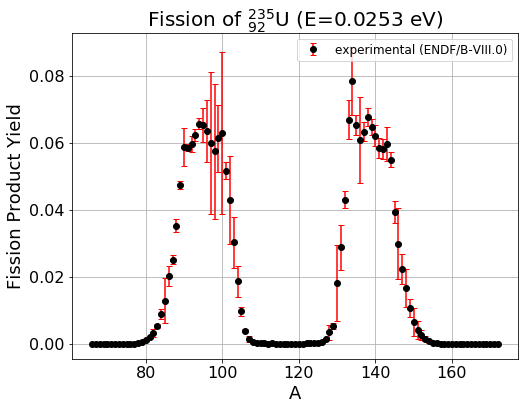

In [3]:
'''Visualize the data'''
# Pandas: python package for tabular data analysis
import pandas as pd

# build a "data frame (i.e. table)"
df = pd.read_csv('data/u-235-fpy-thermal.dat', 
                  names=['A','FP Yield','Uncertainty'], 
                  skiprows=11,
                  delim_whitespace=True)
#print(df)
import matplotlib.pyplot as plt
plt.figure(1, figsize=(8, 6))
 
plt.errorbar(df['A'], df['FP Yield'], yerr=df['Uncertainty'],
             fmt='ok',ecolor='r',label='experimental (ENDF/B-VIII.0)',capsize=3)
    
plt.xlabel(r'A',fontsize=18)
plt.ylabel(r'Fission Product Yield',fontsize=18)
plt.title('Fission of $^{235}_{92}$U (E=0.0253 eV)',fontsize=20)
plt.legend(loc='best',fontsize=12)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
    
plt.grid(True)
plt.show()
print('')

## Generalized least-squares fitting with Fourier basis functions<a id="intro"></a>

The least-squares method with Fourier basis functions is a powerful computational tool for data fitting and data analysis, the course notes OneNote [ChEn-3170-gen-lsq](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/Ep9qLSMssi1MjWvl2wYlTHkBSd5aUUoo1fIoe5pswIV0vA?e=Mhkd6f) collects elements of the theory (see also  [ChEn-3170](https://github.com/dpploy/chen-3170) Notebook 12). 

The Fourier expansion for approximating the fission yield $y(A)$ is

\begin{equation*}
y(A) = \sum\limits_{k=0}^N \alpha_k\,\cos(k\,\mu\,A) + \beta_k\,\sin(k\,\mu\,A)
\end{equation*}

If we have a set of values of the independent variable $A_i, i=1,\ldots,m$, the above Fourier expression when applied to every $A_i$ gives

where $\Amtrx =  \begin{pmatrix}
1 & \cos(\mu\,A_1) & \sin(\mu\,A_1) & \cos(2\mu\,A_1) & \sin(2\mu\,A_1) & \ldots & \cos(N\mu\,A_1) & \sin(N\mu\,A_1)  \\
1 & \cos(\mu\,A_2) & \sin(\mu\,A_2) & \cos(2\mu\,A_2) & \sin(2\mu\,A_2) & \ldots & \cos(N\mu\,A_2) & \sin(N\mu\,A_2)  \\
\vdots  & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
1 & \cos(\mu\,A_m) & \sin(\mu\,A_m) & \cos(2\mu\,A_m) & \sin(2\mu\,A_m) & \ldots & \cos(N\mu\,A_m) & \sin(N\mu\,A_m)  \\
 \end{pmatrix}$, 
 $\xvec =  \begin{pmatrix}
  \alpha_0 \\ 
  \alpha_1 \\
  \beta_1 \\
  \vdots \\
  \alpha_N \\
  \beta_N \\ 
 \end{pmatrix}$, 
and 
$\bvec = \begin{pmatrix}
 y_1 \\ 
 y_2 \\ 
 \vdots  \\ 
 y_m \\ 
\end{pmatrix} $.

In [4]:
import math
import numpy as np # Numpy is the numerical array package for Python

period = np.max(df['A']) - np.min(df['A'])  # [A]
omega  = 1/period                           # cycle frequency [1/A]
mu     = 2*math.pi * omega                  # radian frequency [rad/A]

n_pairs = 6

In [5]:
def build_fourier_matrix( mu, n_pairs, abscissa_vec ):

    import numpy as np
    assert isinstance(n_pairs,int)
    assert isinstance(abscissa_vec,np.ndarray)
        
    a_mtrx = np.ones((abscissa_vec.size, 2*n_pairs + 1))

    for k in range(n_pairs+1):
        if k == 0:
            continue
        a_mtrx[:,2*k-1] = np.cos(k * mu * abscissa_vec)
        a_mtrx[:,2*k]   = np.sin(k * mu * abscissa_vec)

    return a_mtrx            

In [6]:
a_mtrx = build_fourier_matrix( mu, n_pairs, np.array(df['A']) )

b_vec = np.array(df['FP Yield'])

rank = np.linalg.matrix_rank(a_mtrx)
#print('rank(A) =',rank)
assert rank == 2*n_pairs+1

Build the LS normal equations and solve for the optimal coefficients of the fitting

\begin{equation*}
\Amtrx^\top\Amtrx\,\xvec_\text{LS}  = \Amtrx^\top\,\bvec .
\end{equation*}

The least squares solution $\xvec_\text{LS}$ gives the optimal values of the Fourier modes, $\alpha_k\,\cos(k\,\mu\,A)$ and $\beta_k\,\sin(k\,\mu\,A)$.

In [7]:
x_vec = np.linalg.solve( a_mtrx.transpose()@a_mtrx, a_mtrx.transpose()@b_vec )

In [41]:
def fp_yield( mass_number ):
    '''
    Fission product yields curve fitting.

    Parameters
    ----------
    mass_number: float or numpy.ndarray, required
        Nuclide mass number. If `mass_number` is an array, 
        the return value is also an array of values.
    x_a_0: float, required
        Mole fraction of species A.
    
    Returns
    -------
    value: float or numpy.ndarray
        Value or vector of values of the fission product yield
        evaluated at `mass_number`.

    Examples
    --------
    '''
    assert np.min(mass_number) >= min(df['A']) and np.max(mass_number) <= max(df['A']),\
        'Out of range. Min = %r, max = %r, request_min = %r, request_max = %r'%\
        (min(df['A']), max(df['A']), np.min(mass_number), np.max(mass_number) )
    
    a_mtrx = build_fourier_matrix(mu, n_pairs, mass_number )
    fp_yield = a_mtrx @ x_vec
    
    fp_yield[fp_yield<0] = 0.0 # correct for negative values in the curve fitting
        
    return fp_yield

In [36]:
'''Function: plot the LS Fourier fit and all modes'''

def plot_fourier_fit(mass_number_expt, fp_yield_expt, mu, x_vec):
    
    import matplotlib.pyplot as plt
    
    plt.figure(2, figsize=(8,6))

    # plot experimental data
    plt.plot(mass_number_expt, fp_yield_expt,'r*',label='experimental (ENDF/B-VIII.0)')

    # plot LS Fourier fitting
    n_plot_pts = 100
    mass_number_plot = np.linspace(mass_number_expt[0],mass_number_expt[-1],n_plot_pts)
    fp_yield_plot = fp_yield(mass_number_plot)
    
    plt.plot( mass_number_plot, fp_yield_plot,'b--',label='LS Fourier fitting' )

    # plot each of the Fourier modes
    a_mtrx = build_fourier_matrix(mu, n_pairs, mass_number_plot)
    from engy_4350.help import color_map
    colors = color_map(a_mtrx.shape[1])
    
    for j in range(a_mtrx.shape[1]):

        if j != 0:
            color=colors[j-1]
        
        if j == 0:
            color='black'
            k = 0
            label=r'$\alpha_{%i}$=%4.2e'%(k,x_vec[j])
        elif j%2 == 0:
            k = j/2
            label=r'$\beta_{%i}$(=%4.2e) sin($%i\mu t$)'%(k,x_vec[j],k)
        else:
            k = (j+1)/2
            label=r'$\alpha_{%i}$(=%4.2e) cos($%i\mu t$)'%(k,x_vec[j],k)
        
        vertical_offset = 0.03 # to improve visibility of modes
        if j == 0:
            vertical_offset = 0
        
        plt.plot(mass_number_plot, x_vec[j]*a_mtrx[:,j]-vertical_offset,label=label,color=color )
        
    plt.xlabel(r'A',fontsize=18)
    plt.ylabel(r'Fission Products Yield and Fit',fontsize=18)
    plt.title('Fission of $^{235}_{92}$U (E=0.0253 eV)',fontsize=20)

    (x_min,x_max) = plt.xlim()
    dx = abs(x_max-x_min)
    x_text = x_min + dx*0.25
    
    (y_min,y_max) = plt.ylim()
    dy = abs(y_max-y_min)
    y_text = y_min + dy*0.02
    
    plt.text(x_text, y_text, 
             r'$\mu=$%8.2e [rad/A],   $N$=%i'%
             (mu,n_pairs),fontsize=16)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='upper right',bbox_to_anchor=(1.55, 1),fontsize=12)
    plt.grid(True)
    plt.show()
    print('')
    return

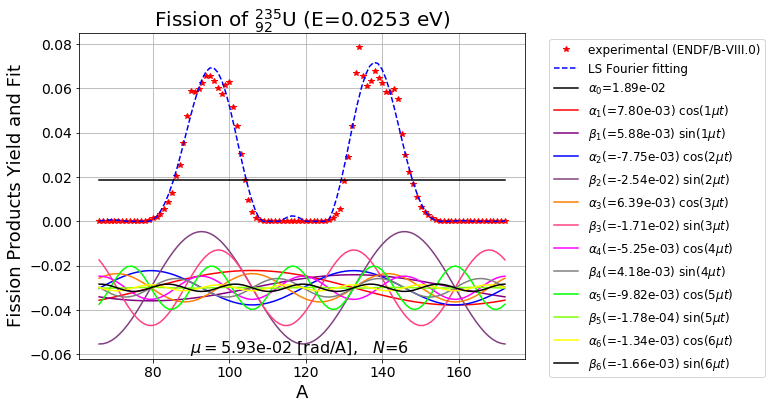

In [37]:
'''Plot the LS Fourier fit'''

plot_fourier_fit(np.array(df['A']), np.array(df['FP Yield']), mu, x_vec)

In [19]:
'''Usage of FP yield function'''
np.set_printoptions(precision=5)
# single value A
print('y[80] = ',fp_yield(np.array([80])))

# multiple values of A at once
a_values = np.array([80,90,100,110,120,130,140,150,160],np.float64)
y_values = fp_yield(a_values)
for y in y_values:
    i = list(y_values).index(y)
    print('y[%2i] = %+5.3e'%(a_values[i],y))

y[80] =  [0.00049]
y[80] = +4.880e-04
y[90] = +4.825e-02
y[100] = +5.228e-02
y[110] = +0.000e+00
y[110] = +0.000e+00
y[130] = +2.462e-02
y[140] = +6.828e-02
y[150] = +8.415e-03
y[160] = +2.684e-04


In [20]:
def build_fourier_matrix_prime( mu, n_pairs, abscissa_vec ):

    import numpy as np
    a_mtrx = np.zeros((abscissa_vec.size, 2*n_pairs + 1))

    for k in range(n_pairs+1):
        if k == 0:
            continue
        a_mtrx[:,2*k-1] = - k * mu * np.sin(k * mu * abscissa_vec)
        a_mtrx[:,2*k]   =   k * mu * np.cos(k * mu * abscissa_vec)

    return a_mtrx  

In [43]:
def fp_yield_prime( mass_number ):
    '''
    Fission product yields curve fitting.

    Parameters
    ----------
    mass_number: float or numpy.ndarray, required
        Nuclide mass number. If `mass_number` is an array, 
        the return value is also an array of values.
    x_a_0: float, required
        Mole fraction of species A.
    
    Returns
    -------
    value: float or numpy.ndarray
        Value or vector of values of the fission product yield
        evaluated at `mass_number`.

    Examples
    --------
    '''
    assert np.min(mass_number) >= min(df['A']) and np.max(mass_number) <= max(df['A']),\
        'Out of range. Min = %r, max = %r, request_min = %r, request_max = %r'%\
        (min(df['A']), max(df['A']), np.min(mass_number), np.max(mass_number) )
    
    a_mtrx = build_fourier_matrix_prime(mu, n_pairs, mass_number )
    fp_yield_prime = a_mtrx @ x_vec
        
    return fp_yield_prime

In [22]:
'''Usage of derivative of the FP yield function'''
np.set_printoptions(precision=5)
# single value A
print("y'[80] = ",fp_yield_prime(np.array([80],np.float64)))

# multiple values of A at once
a_values = np.array([80,90,100,110,120,130,140,150,160],np.float64)
y_prime_values = fp_yield_prime(a_values)
for y in y_prime_values:
    i = list(y_prime_values).index(y)
    print("y'[%2i] = %+5.3e"%(a_values[i],y))

y'[80] =  [0.0013]
y'[80] = +1.301e-03
y'[90] = +6.563e-03
y'[100] = -6.873e-03
y'[110] = -4.205e-04
y'[120] = -1.442e-03
y'[130] = +8.053e-03
y'[140] = -3.524e-03
y'[150] = -3.701e-03
y'[160] = +6.327e-05


In [23]:
def build_fourier_matrix_double_prime( mu, n_pairs, abscissa_vec ):

    import numpy as np
    a_mtrx = np.zeros((abscissa_vec.size, 2*n_pairs + 1))

    for k in range(n_pairs+1):
        if k == 0:
            continue
        a_mtrx[:,2*k-1] = - k*k * mu*mu * np.cos(k * mu * abscissa_vec)
        a_mtrx[:,2*k]   = - k*k * mu*mu * np.sin(k * mu * abscissa_vec)

    return a_mtrx  

In [44]:
def fp_yield_double_prime( mass_number ):
    '''
    Fission product yields curve fitting.

    Parameters
    ----------
    mass_number: float or numpy.ndarray, required
        Nuclide mass number. If `mass_number` is an array, 
        the return value is also an array of values.
    x_a_0: float, required
        Mole fraction of species A.
    
    Returns
    -------
    value: float or numpy.ndarray
        Value or vector of values of the fission product yield
        evaluated at `mass_number`.

    Examples
    --------
    '''   
    assert np.min(mass_number) >= min(df['A']) and np.max(mass_number) <= max(df['A']),\
        'Out of range. Min = %r, max = %r, request_min = %r, request_max = %r'%\
        (min(df['A']), max(df['A']), np.min(mass_number), np.max(mass_number) )
        
    a_mtrx = build_fourier_matrix_double_prime(mu, n_pairs, mass_number )
    fp_yield_double_prime = a_mtrx @ x_vec
        
    return fp_yield_double_prime

In [45]:
'''Usage of second derivative of the FP yield function'''
np.set_printoptions(precision=5)
# single value A
print('y"(80) = ',fp_yield_double_prime(np.array([80],np.float64)))

# multiple values of A at once
a_values = np.array([80,90,100,110,120,130,140,150,160],np.float64)
y_double_prime_values = fp_yield_double_prime(a_values)
for y in y_double_prime_values:
    i = list(y_double_prime_values).index(y)
    print('y"[%2i] = %+5.3e'%(a_values[i],y))

y"(80) =  [0.00062]
y"[80] = +6.195e-04
y"[90] = -4.152e-04
y"[100] = -9.239e-04
y"[110] = +9.796e-04
y"[120] = -7.932e-05
y"[130] = +6.002e-04
y"[140] = -1.607e-03
y"[150] = +9.468e-04
y"[160] = -8.440e-05


In [46]:
'''Function: plot the derivative of the fp_yield function'''

def plot_fp_yield_prime(mass_number_expt, mu, x_vec):
    
    import matplotlib.pyplot as plt
    
    plt.figure(2, figsize=(7,7))

    # plot LS Fourier fitting
    n_plot_pts = 100
    mass_number_plot = np.linspace(mass_number_expt[0],mass_number_expt[-1],n_plot_pts)
    
    fp_yield_prime_plot = fp_yield_prime(mass_number_plot)
    
    plt.plot( mass_number_plot, fp_yield_prime_plot,'b--',label='FP Yield Derivative' )

    # plot all derivatives of the Fourier modes
    a_mtrx = build_fourier_matrix_prime(mu, n_pairs, mass_number_plot )
    from engy_4350.help import color_map
    colors = color_map(a_mtrx.shape[1])
    
    for j in range(a_mtrx.shape[1]):

        if j != 0:
            color=colors[j-1]
        
        if j == 0:
            color='black'
            k = 0
            label=r'$\alpha_{%i}$=%4.2e'%(k,x_vec[j])
        elif j%2 == 0:
            k = j/2
            label=r'$\beta_{%i}$(=%4.2e) sin($%i\mu t$)'%(k,x_vec[j],k)
        else:
            k = (j+1)/2
            label=r'$\alpha_{%i}$(=%4.2e) cos($%i\mu t$)'%(k,x_vec[j],k)
        
        vertical_offset = 0.03 # to improve visibility of modes
        if j == 0:
            vertical_offset = 0
        
        #plt.plot(mass_number_plot, x_vec[j]*a_mtrx[:,j]-vertical_offset,label=label,color=color )
        
    plt.xlabel(r'A',fontsize=18)
    plt.ylabel(r'Derivative of Fission Products Yield',fontsize=18)
    plt.title('Fission of $^{235}_{92}$U (E=0.0253 eV)',fontsize=20)

    (x_min,x_max) = plt.xlim()
    dx = abs(x_max-x_min)
    x_text = x_min + dx*0.25
    
    (y_min,y_max) = plt.ylim()
    dy = abs(y_max-y_min)
    y_text = y_min + dy*0.02
    
    plt.text(x_text, y_text, 
             r'$\mu=$%8.2e [rad/A],   $N$=%i'%
             (mu,n_pairs),fontsize=16)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='upper right',bbox_to_anchor=(1.55, 1),fontsize=12)
    plt.grid(True)
    plt.show()
    print('')
    return

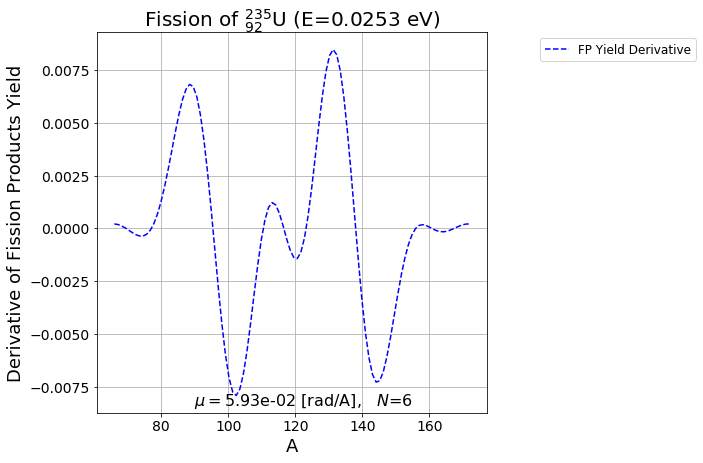

In [47]:
'''Plot the FP Yield Derivative'''

plot_fp_yield_prime(np.array(df['A']), mu, x_vec)

In [48]:
"""Newton's method"""

def newton_solve( function,
                  function_prime,
                  root_0=0.0,
                  k_max=30, tolerance=1.0e-10, verbose=True ):

    # Other initialization
    delta_k = 1e+10
    f_k     = 1e+10
    root = root_0

    if verbose is True:
        print('\n')
        print('******************************************************')
        print("          Newton's Method Iterations                  ")
        print('******************************************************')
        print("k |  f(x_k)  |  f'(x_k) | |del x_k| |    x_k   |convg|")
        print('------------------------------------------------------')

    import math
    k = 0
    
    while (abs(delta_k) > tolerance or abs(f_k) > tolerance) and k <= k_max:
        
        f_k       = function( root )
        f_prime_k = function_prime( root )
        
        delta_k_old = delta_k
        delta_k = -f_k / f_prime_k
        
        root += delta_k
        
        if k > 0:
            if delta_k != 0.0 and delta_k_old != 0.0:
                convergence_factor = math.log(abs(delta_k),10) / math.log(abs(delta_k_old),10)
            else:
                convergence_factor = 0.0  
        else:
            convergence_factor = 0.0
            
        k = k + 1
        
        if verbose is True:
            print('%2i %+5.3e %+5.3e %+5.3e  %+5.3e %5.2f'%\
                  (k,f_k,f_prime_k,abs(delta_k),root,convergence_factor))

    if verbose is True:
        print('******************************************************') 
        print('Root = %8.5e'%root)
    
    return root

In [ ]:
'''Find root of y(A)'''

n_scan_pts = 10
mass_number_scan = np.linspace(80,160,n_scan_pts)

k_max = 20
tolerance = 1.0e-8
for a in mass_number_scan:
    mass_num_0 = np.array([88],np.float64)

    mass_num = newton_solve( fp_yield_prime, fp_yield_double_prime,
                             mass_num_0, 
                             k_max, tolerance )
    print('')
    print('Root')
    print('A = %5.3e\n'%mass_num)